In [1]:
import matplotlib.pyplot as plt
import numpy
import math
import pandas as pd
df_noHGC = pd.read_csv("results_W2Wp2_4_2p6/csv_simadd.csv")
df_HGC = pd.read_csv("results_W2Wp2_4_2p6_withHGC/csv_simadd.csv")
df_noHGC = df_noHGC[df_noHGC['Wp2_corr']>2.8]
df_HGC = df_HGC[df_HGC['Wp2_corr']>2.8]


In [2]:
df_noHGC.head()

,Q2,Q2_corr,Q2_corr_err,xbj_set,xbj,xbj_corr,xbj_corr_err,z_set,z,z_corr,...,yield_neg_incnorad,yield_neg_incrad,yield_pos_incnorad,yield_pos_incrad,W2_corr,Wp2_corr,xprime_corr,zprime_corr,shms_p,shms_dp_corr
0,4.0,3.37283,0.010463,0.35,0.275,0.278449,0.000075,0.4,0.325,0.344233,...,5.62786,5.40276,8.18512,8.75064,9.62535,6.52256,0.272964,0.337425,2.22288,-8.45316
1,4.0,3.37721,0.007968,0.35,0.275,0.282215,0.000071,0.4,0.375,0.374039,...,35.57560,34.13040,52.54530,51.08050,9.47774,6.17039,0.276284,0.365844,2.38751,-1.67293
2,4.0,3.78909,0.016362,0.35,0.325,0.324495,0.000101,0.4,0.375,0.376567,...,55.00490,50.82080,82.79910,80.47860,8.77513,5.71176,0.316463,0.366855,2.34442,-3.44747
3,4.0,4.20506,0.016710,0.35,0.375,0.371154,0.000095,0.4,0.375,0.380989,...,28.88980,25.95330,44.15790,40.26040,8.01213,5.19499,0.360280,0.369864,2.30082,-5.24338
4,4.0,4.59435,0.011294,0.35,0.425,0.418452,0.000089,0.4,0.375,0.386514,...,7.54062,6.56438,11.66470,9.98290,7.27120,4.67937,0.404626,0.374097,2.26221,-6.83342


xs = df[df['Q2']==4].sort_values('xbj')['xbj'].unique()
print(xs)

In [3]:
df_HGC.head()

,Q2,Q2_corr,Q2_corr_err,xbj_set,xbj,xbj_corr,xbj_corr_err,z_set,z,z_corr,...,yield_neg_incnorad,yield_neg_incrad,yield_pos_incnorad,yield_pos_incrad,W2_corr,Wp2_corr,xprime_corr,zprime_corr,shms_p,shms_dp_corr
0,4.0,3.37375,0.010456,0.35,0.275,0.278547,0.000075,0.4,0.325,0.344217,...,5.62786,5.40276,8.18512,8.75064,9.62351,6.52161,0.273147,0.337384,2.22260,-8.46460
1,4.0,3.37673,0.007988,0.35,0.275,0.282172,0.000071,0.4,0.375,0.373987,...,35.57560,34.13040,52.54530,51.08050,9.47837,6.17127,0.276198,0.365745,2.38720,-1.68572
2,4.0,3.78957,0.016360,0.35,0.325,0.324541,0.000101,0.4,0.375,0.376561,...,55.00490,50.82080,82.79910,80.47860,8.77450,5.71147,0.316549,0.366839,2.34435,-3.45038
3,4.0,4.20530,0.016627,0.35,0.375,0.371166,0.000095,0.4,0.375,0.380959,...,28.88980,25.95330,44.15790,40.26040,8.01222,5.19520,0.360302,0.369804,2.30071,-5.24778
4,4.0,4.59431,0.011347,0.35,0.425,0.418456,0.000089,0.4,0.375,0.386502,...,7.54062,6.56438,11.66470,9.98290,7.27097,4.67891,0.404637,0.374078,2.26207,-6.83899


In [4]:
save_name = 'withcorr'
def Get_pi_purity_HGC(shmsp):
    pi_purity = 1.0
    if shmsp>2.8:
        #pi_purity = 1
        pi_purity = (-0.00156196*shmsp+1.00310863)
    if pi_purity>1:
        pi_purity=1.0
    return 1/pi_purity
def Get_pi_purity_noHGC(shmsp):
    pi_purity = 1.0
    if shmsp>2.8:
        #pi_purity = 1
        pi_purity = (-0.01532706*shmsp**2+0.05889954*shmsp+0.94763371)
    if pi_purity>1:
        pi_purity = 1.0
    return 1/pi_purity

def Get_weighted(values,errs):
    sums = 0
    sig = 0
    for i in range(len(values)):
        for j in range(len(errs)):
            sums+=values[i]/(errs[i]*errs[i])
            sig+=1/(errs[i]*errs[i])
    return sums/sig   
def Get_weighted_average(value,error):
    sum_mean = 0
    sum_sigma = 0
    for i in range(len(value)):
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma
def Get_weighted_sigma(value,error):
    sum_sigma = 0
    for i in range(len(value)):
        sum_sigma += 1/(error[i]*error[i])
    return math.sqrt(1/sum_sigma)
Q2s = [3.80473,4.56863,5.19412]
Q2_str = ["4.000000","4.750000","5.500000"]

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/3539943296.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df_HGC[df_HGC['Q2']==4][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/3539943296.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_HGC[df_HGC['Q2']==4][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/3539943296.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RYi_noHGC_raw = df_noHGC[df_noHGC['Q2']==4][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY_rho'].values[0]


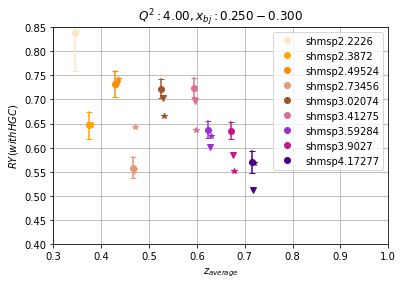

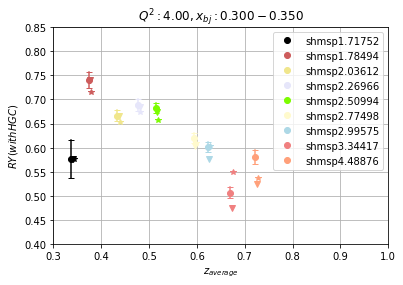

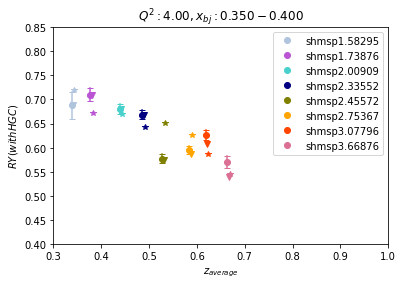

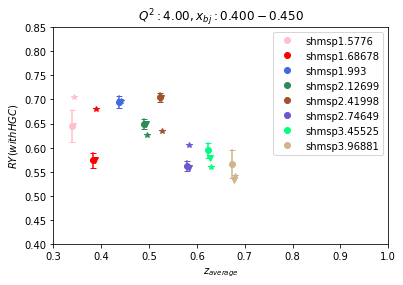

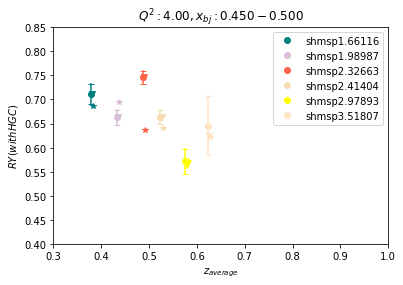

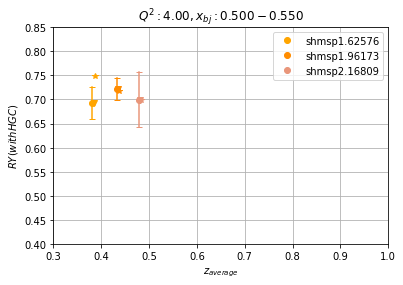

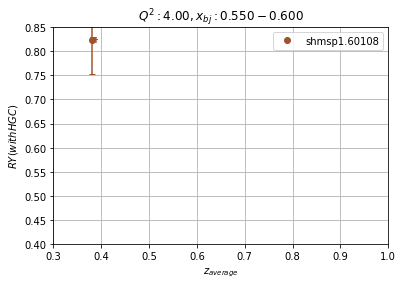

In [14]:
xbj_ones_corr = []
xbj_all_corr=[]
xbj_ones_plot = []
i_col = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','olive','orange','orangered','palevioletred','pink','red','royalblue','seagreen','sienna','slateblue','springgreen','tan','teal','thistle','tomato','wheat','yellow','bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','bisque','orange','darkorange','darksalmon','sienna','bisque','orange','darkorange','darksalmon','sienna']

xs = df_HGC[df_HGC['Q2']==4].sort_values('xbj')['xbj'].unique()
#print(xs)
#ax.errorbar(xs,zs,RYs,RY_err,marker = "_")
for ix in range(0,len(xs)):
    fig = plt.figure()
    ax = fig.add_subplot()
    xbj_one_corr = []
    xbj_one_err_corr = []
    CSV_one = []
    CSV_one_err = []
    #RY_err = []
    zs = df_HGC[df_HGC['Q2']==4][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
    #print(zs)
    xbj = xs[ix]
    for iz in zs:
        #print(iRunGroup)
        RYs = []
        RYs_HGC = []
        RYs_nocorr = []
        RYs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        
        for i,row in df_HGC[df_HGC['Q2']==4][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
            shmsp = row['shms_p']
            zi_corr = row['z_corr']
            #print(z_corr)
            RYi_noHGC_raw = df_noHGC[df_noHGC['Q2']==4][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY_rho'].values[0]
            RYs_nocorr.append(RYi_noHGC_raw)
            RYi_error = row['error']
            pi_purity_noHGC = Get_pi_purity_noHGC(shmsp)
            #print(shmsp,pi_purity_noHGC)
            RYi_noHGC = RYi_noHGC_raw*pi_purity_noHGC
            RYs.append(RYi_noHGC)
            #print('RYi_noHGC = ',RYi_noHGC)
            RYi_HGC_raw= row['RY_rho']
            pi_purity_HGC = Get_pi_purity_HGC(shmsp)
            RYi_HGC = RYi_HGC_raw*pi_purity_HGC
            RYs_HGC.append(RYi_HGC)
            RYs_error.append(RYi_error)
            #print('RY_error ',RY_error)
            zs_corr.append(zi_corr)
            zi_corr_err = row["z_corr_err"]
            zs_corr_err.append(zi_corr_err)
            xbji_corr = row["xbj_corr"]
            xbji_corr_err = row["xbj_corr_err"]
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = row["Q2_corr"]
            Q2i_corr_err = row["Q2_corr_err"]
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
            if Q2i_corr<3:
                print(Q2i_corr)
         
            xbj_ones_corr.append(xbji_corr)
            #print(xbji_corr)
            #ax.plot([z_corr,z_corr],[RY+RY_error,RY-RY_error],marker="_",color = colors[RunGroup//10])
        xbj_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        #print(xbj_corr)
        if abs(xbj_corr-xbj)>0.025:
            print(xbj_corr-xbj)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        Q2_corr = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        if Q2_corr<3:
            print("corr ",Q2_corr)
        #print('RYs ',RYs)
        #print('RYs err ',RYs_error)
        RY = Get_weighted_average(RYs,RYs_error)
        RY_err = Get_weighted_sigma(RYs,RYs_error)
        RY_HGC = Get_weighted_average(RYs_HGC,RYs_error)
        RY_nocorr = Get_weighted_average(RYs_nocorr,RYs_error)
        #print('RY is ',RY,'RY_HGC is ',RY_HGC)
        ax.plot([z_corr,z_corr],[RY+RY_err,RY-RY_err],color = colors_all[i_col],marker = "_")
        #plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"$Q^2:{Q2_corr:.3f},x_{{bj}}:{xbj_corr:.3f}$")
        plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"shmsp{shmsp}")
        plt.plot(z_corr+0.003,RY_nocorr,"v",color = colors_all[i_col])
        #ax.plot([z_corr+0.005,z_corr+0.005],[RY_HGC+RY_err,RY_HGC-RY_err],marker = "_",color = colors_all[i_col])
        plt.plot(z_corr+0.005,RY_HGC,"*",color = colors_all[i_col])
        xbj_all_corr.append(xbj_corr)
        xbj_one_corr.append(xbj_corr)
        xbj_onei_err_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_one_err_corr.append(xbj_onei_err_corr)
        plt.xlabel(r'$z_{average}$')
        plt.ylabel(r'$RY(withHGC)$')
        plt.xlim(0.3,1)
        plt.ylim(0.4,0.85)
        plt.legend()
        plt.grid()
        ax.set_title(f"$Q^2:{Q2_str[0][0:4]},x_{{bj}}:{(xbj-0.025):.3f}-{(xbj+0.025):.3f}$")#str(xbj-0.025)[0:5]+"-"+str(xbj+0.025)[0:5])
        i_col = i_col+1
                    
    xbj_one = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
    xbj_ones_plot.append(xbj_one)
    xbj_one_err = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/726116958.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df_HGC[df_HGC['Q2']==4][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/726116958.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_HGC[df_HGC['Q2']==4][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/726116958.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RYi_noHGC_raw = df_noHGC[df_noHGC['Q2']==4][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY_rho'].values[0]


-0.02622031635007693


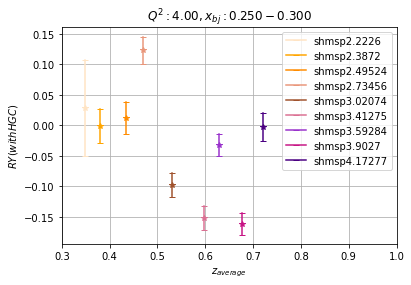

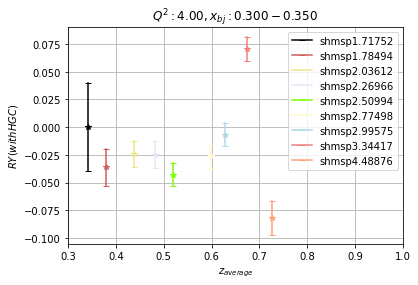

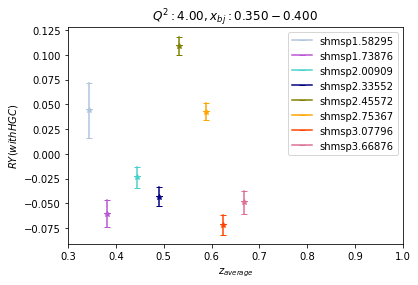

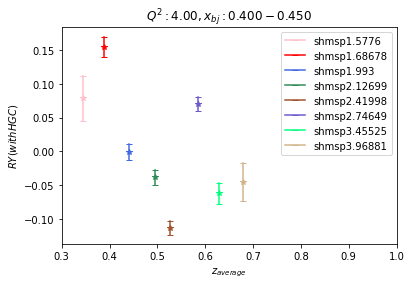

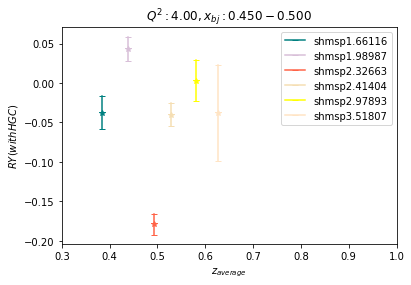

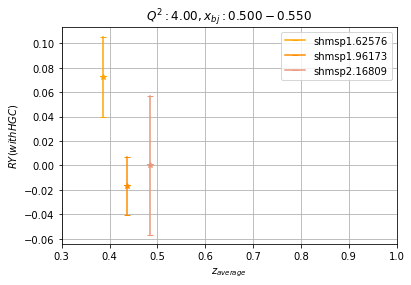

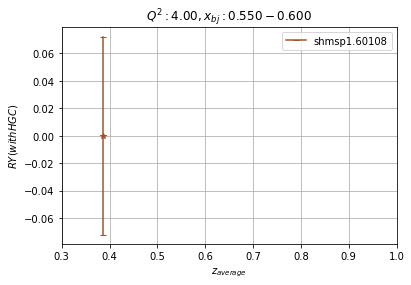

In [6]:
xbj_ones_corr = []
xbj_all_corr=[]
xbj_ones_plot = []
i_col = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','olive','orange','orangered','palevioletred','pink','red','royalblue','seagreen','sienna','slateblue','springgreen','tan','teal','thistle','tomato','wheat','yellow','bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','bisque','orange','darkorange','darksalmon','sienna','bisque','orange','darkorange','darksalmon','sienna']
dRYs = []
dRYs_err = []
xs = df_HGC[df_HGC['Q2']==4].sort_values('xbj')['xbj'].unique()

#print(xs)
#ax.errorbar(xs,zs,RYs,RY_err,marker = "_")
for ix in range(0,len(xs)):
    fig = plt.figure()
    ax = fig.add_subplot()
    xbj_one_corr = []
    xbj_one_err_corr = []
    CSV_one = []
    CSV_one_err = []
    #RY_err = []
    zs = df_HGC[df_HGC['Q2']==4][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
    #print(zs)
    xbj = xs[ix]
    for iz in zs:
        #print(iRunGroup)
        RYs = []
        RYs_HGC = []
        RYs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        
        for i,row in df_HGC[df_HGC['Q2']==4][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
            shmsp = row['shms_p']
            zi_corr = row['z_corr']
            #print(z_corr)
            RYi_noHGC_raw = df_noHGC[df_noHGC['Q2']==4][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY_rho'].values[0]
            RYi_error = row['error']
            pi_purity_noHGC = Get_pi_purity_noHGC(shmsp)
            RYi_noHGC = RYi_noHGC_raw*pi_purity_noHGC
            #RYs.append(RYi_noHGC)
            #print('RYi_noHGC = ',RYi_noHGC)
            RYi_HGC_raw = row['RY_rho']
            pi_purity_HGC = Get_pi_purity_HGC(shmsp)
            RYi_HGC = RYi_HGC_raw*pi_purity_HGC
            dRY = (RYi_HGC-RYi_noHGC)/RYi_HGC
            RYs_HGC.append(dRY)
            RYs_error.append(RYi_error)
            #print('RY_error ',RY_error)
            zs_corr.append(zi_corr)
            zi_corr_err = row["z_corr_err"]
            zs_corr_err.append(zi_corr_err)
            xbji_corr = row["xbj_corr"]
            xbji_corr_err = row["xbj_corr_err"]
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = row["Q2_corr"]
            Q2i_corr_err = row["Q2_corr_err"]
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
            if Q2i_corr<3:
                print(Q2i_corr)
         
            xbj_ones_corr.append(xbji_corr)
            if shmsp>2.9:
                dRYs.append(dRY)
                dRYs_err.append(RYi_error)
            #print(xbji_corr)
            #ax.plot([z_corr,z_corr],[RY+RY_error,RY-RY_error],marker="_",color = colors[RunGroup//10])
        xbj_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        #print(xbj_corr)
        if abs(xbj_corr-xbj)>0.025:
            print(xbj_corr-xbj)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        Q2_corr = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        if Q2_corr<3:
            print("corr ",Q2_corr)
        #print('RYs ',RYs)
        #print('RYs err ',RYs_error)
        #RY = Get_weighted_average(RYs,RYs_error)
        RY_err = Get_weighted_sigma(RYs_HGC,RYs_error)
        RY_HGC = Get_weighted_average(RYs_HGC,RYs_error)
        
        #print('RY is ',RY,'RY_HGC is ',RY_HGC)
        #ax.plot([z_corr,z_corr],[RY+RY_err,RY-RY_err],color = colors_all[i_col],marker = "_")
        #plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"$Q^2:{Q2_corr:.3f},x_{{bj}}:{xbj_corr:.3f}$")
        #plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"shmsp{shmsp}")
        ax.plot([z_corr+0.005,z_corr+0.005],[RY_HGC+RY_err,RY_HGC-RY_err],marker = "_",color = colors_all[i_col],label = f"shmsp{shmsp}")
        plt.plot(z_corr+0.005,RY_HGC,"*",color = colors_all[i_col])
        xbj_all_corr.append(xbj_corr)
        xbj_one_corr.append(xbj_corr)
        xbj_onei_err_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_one_err_corr.append(xbj_onei_err_corr)
        plt.xlabel(r'$z_{average}$')
        plt.ylabel(r'$RY(withHGC)$')
        plt.xlim(0.3,1)
        #plt.ylim(0.4,0.85)
        plt.legend()
        plt.grid()
        ax.set_title(f"$Q^2:{Q2_str[0][0:4]},x_{{bj}}:{(xbj-0.025):.3f}-{(xbj+0.025):.3f}$")#str(xbj-0.025)[0:5]+"-"+str(xbj+0.025)[0:5])
        i_col = i_col+1
                    
    xbj_one = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
    xbj_ones_plot.append(xbj_one)
    xbj_one_err = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
print(Get_weighted(dRYs,dRYs_err))

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/3276626982.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df_HGC[df_HGC['Q2']==4][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/3276626982.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_HGC[df_HGC['Q2']==4][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/3276626982.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RYi_noHGC_raw = df_noHGC[df_noHGC['Q2']==4][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY_rho'].values[0]
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


-0.02622031635007693


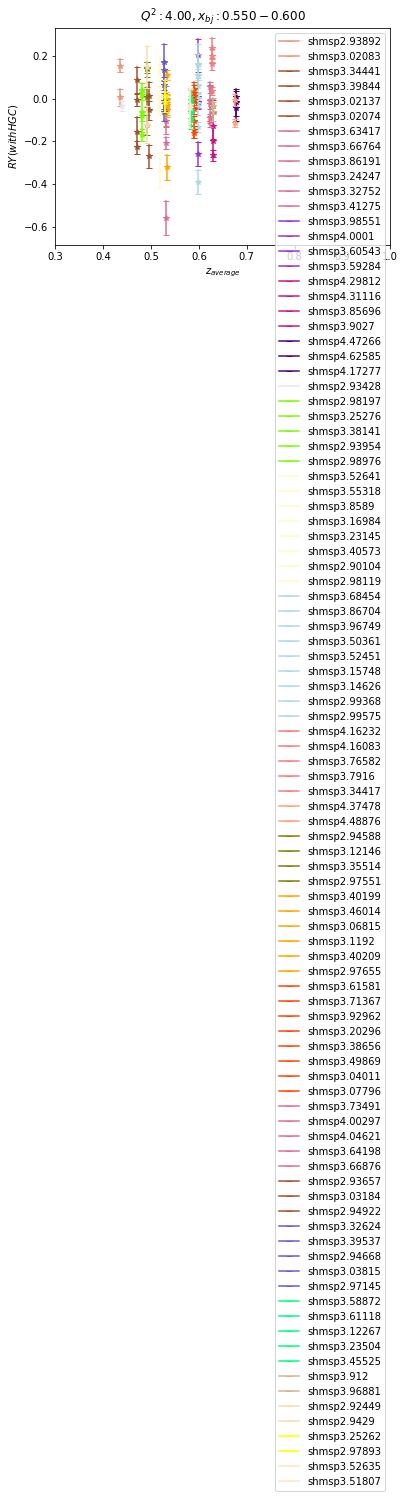

In [7]:
xbj_ones_corr = []
xbj_all_corr=[]
xbj_ones_plot = []
i_col = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','olive','orange','orangered','palevioletred','pink','red','royalblue','seagreen','sienna','slateblue','springgreen','tan','teal','thistle','tomato','wheat','yellow','bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','bisque','orange','darkorange','darksalmon','sienna','bisque','orange','darkorange','darksalmon','sienna']
dRYs = []
dRYs_err = []
xs = df_HGC[df_HGC['Q2']==4].sort_values('xbj')['xbj'].unique()
fig = plt.figure()
ax = fig.add_subplot()
#print(xs)
#ax.errorbar(xs,zs,RYs,RY_err,marker = "_")
for ix in range(0,len(xs)):
    
    xbj_one_corr = []
    xbj_one_err_corr = []
    CSV_one = []
    CSV_one_err = []
    #RY_err = []
    zs = df_HGC[df_HGC['Q2']==4][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
    #print(zs)
    xbj = xs[ix]
    for iz in zs:
        #print(iRunGroup)
        RYs = []
        RYs_HGC = []
        RYs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        
        for i,row in df_HGC[df_HGC['Q2']==4][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
            shmsp = row['shms_p']
            zi_corr = row['z_corr']
            #print(z_corr)
            RYi_noHGC_raw = df_noHGC[df_noHGC['Q2']==4][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY_rho'].values[0]
            RYi_error = row['error']
            pi_purity_noHGC = Get_pi_purity_noHGC(shmsp)
            RYi_noHGC = RYi_noHGC_raw*pi_purity_noHGC
            #RYs.append(RYi_noHGC)
            #print('RYi_noHGC = ',RYi_noHGC)
            RYi_HGC_raw= row['RY_rho']
            pi_purity_HGC = Get_pi_purity_HGC(shmsp)
            RYi_HGC = RYi_HGC_raw*pi_purity_HGC
            dRY = (RYi_HGC-RYi_noHGC)/RYi_HGC
            RYs_HGC.append(dRY)
            RYs_error.append(RYi_error)
            #print('RY_error ',RY_error)
            zs_corr.append(zi_corr)
            zi_corr_err = row["z_corr_err"]
            zs_corr_err.append(zi_corr_err)
            xbji_corr = row["xbj_corr"]
            xbji_corr_err = row["xbj_corr_err"]
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = row["Q2_corr"]
            Q2i_corr_err = row["Q2_corr_err"]
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
            if Q2i_corr<3:
                print(Q2i_corr)
         
            xbj_ones_corr.append(xbji_corr)
            if shmsp>2.9:
                dRYs.append(dRY)
                dRYs_err.append(RYi_error)
                ax.plot([z_corr+0.005,z_corr+0.005],[dRY+RYi_error,dRY-RYi_error],marker = "_",color = colors_all[i_col],label = f"shmsp{shmsp}")
                plt.plot(z_corr+0.005,dRY,"*",color = colors_all[i_col])


            #print(xbji_corr)
            #ax.plot([z_corr,z_corr],[RY+RY_error,RY-RY_error],marker="_",color = colors[RunGroup//10])
        xbj_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        #print(xbj_corr)
        if abs(xbj_corr-xbj)>0.025:
            print(xbj_corr-xbj)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        Q2_corr = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        if Q2_corr<3:
            print("corr ",Q2_corr)
        #print('RYs ',RYs)
        #print('RYs err ',RYs_error)
        #RY = Get_weighted_average(RYs,RYs_error)
        RY_err = Get_weighted_sigma(RYs_HGC,RYs_error)
        RY_HGC = Get_weighted_average(RYs_HGC,RYs_error)
        
        #print('RY is ',RY,'RY_HGC is ',RY_HGC)
        #ax.plot([z_corr,z_corr],[RY+RY_err,RY-RY_err],color = colors_all[i_col],marker = "_")
        #plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"$Q^2:{Q2_corr:.3f},x_{{bj}}:{xbj_corr:.3f}$")
        #plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"shmsp{shmsp}")
        
        xbj_all_corr.append(xbj_corr)
        xbj_one_corr.append(xbj_corr)
        xbj_onei_err_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_one_err_corr.append(xbj_onei_err_corr)
        plt.xlabel(r'$z_{average}$')
        plt.ylabel(r'$RY(withHGC)$')
        plt.xlim(0.3,1)
        #plt.ylim(0.4,0.85)
        plt.legend()
        plt.grid()
        ax.set_title(f"$Q^2:{Q2_str[0][0:4]},x_{{bj}}:{(xbj-0.025):.3f}-{(xbj+0.025):.3f}$")#str(xbj-0.025)[0:5]+"-"+str(xbj+0.025)[0:5])
        i_col = i_col+1
                    
    xbj_one = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
    xbj_ones_plot.append(xbj_one)
    xbj_one_err = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
print(Get_weighted(dRYs,dRYs_err))
plt.savefig(f'results/1stQ2_HGC_dRY_{save_name}.pdf')

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/529210197.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df_HGC[df_HGC['Q2']==4.75][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/529210197.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_HGC[df_HGC['Q2']==4.75][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/529210197.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RYi_noHGC_raw = df_noHGC[df_noHGC['Q2']==4.75][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY_rho'].values[0]


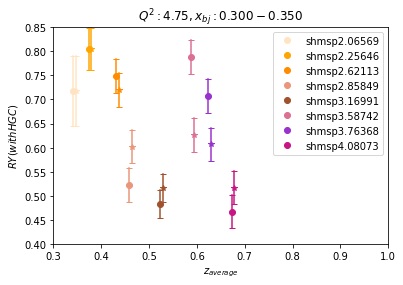

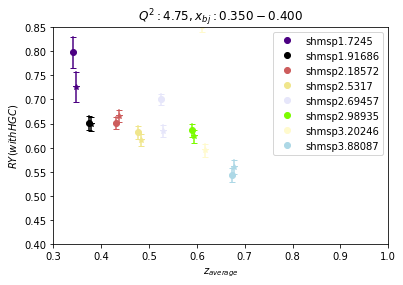

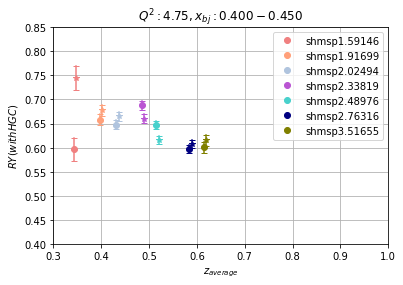

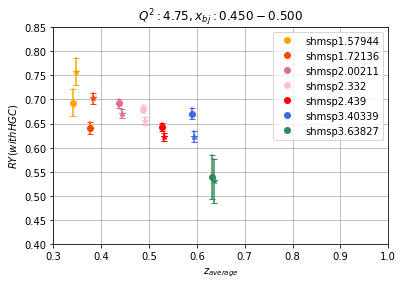

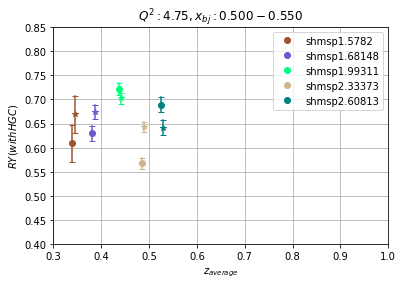

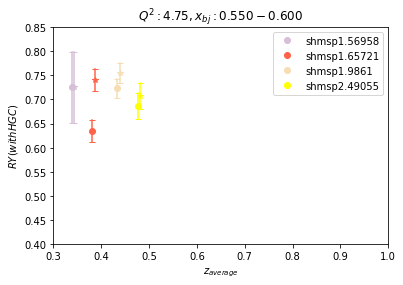

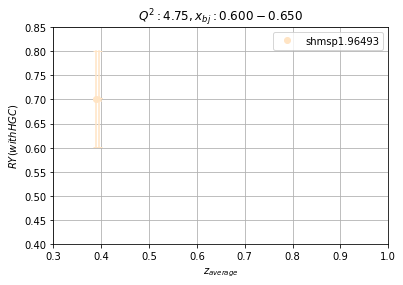

In [8]:
xbj_ones_corr = []
xbj_all_corr=[]
xbj_ones_plot = []
i_col = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','olive','orange','orangered','palevioletred','pink','red','royalblue','seagreen','sienna','slateblue','springgreen','tan','teal','thistle','tomato','wheat','yellow','bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','bisque','orange','darkorange','darksalmon','sienna','bisque','orange','darkorange','darksalmon','sienna']

xs = df_HGC[df_HGC['Q2']==4.75].sort_values('xbj')['xbj'].unique()
#print(xs)
#ax.errorbar(xs,zs,RYs,RY_err,marker = "_")
for ix in range(0,len(xs)):
    fig = plt.figure()
    ax = fig.add_subplot()
    xbj_one_corr = []
    xbj_one_err_corr = []
    CSV_one = []
    CSV_one_err = []
    #RY_err = []
    zs = df_HGC[df_HGC['Q2']==4.75][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
    #print(zs)
    xbj = xs[ix]
    for iz in zs:
        #print(iRunGroup)
        RYs = []
        RYs_HGC = []
        RYs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        
        for i,row in df_HGC[df_HGC['Q2']==4.75][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
            shmsp = row['shms_p']
            zi_corr = row['z_corr']
            #print(z_corr)
            #RYi_noHGC = df_noHGC[df_noHGC['Q2']==4.75][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY'].values[0]
            RYi_noHGC_raw = df_noHGC[df_noHGC['Q2']==4.75][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY_rho'].values[0]
            #if(len(RYi_noHGC)>1):
             #   print("duplicate warning",xs[ix],iz)
             #   print(RYi_noHGC.values[1:])
            RYi_error = row['error']
            pi_purity_noHGC = Get_pi_purity_noHGC(shmsp)
            RYi_noHGC = RYi_noHGC_raw*pi_purity_noHGC
            RYs.append(RYi_noHGC)
            #print('RYi_noHGC = ',RYi_noHGC)
            #RYi_HGC= row['RY']
            RYi_HGC_raw= row['RY_rho']
            pi_purity_HGC = Get_pi_purity_HGC(shmsp)
            RYi_HGC = RYi_HGC_raw*pi_purity_HGC
            RYs_HGC.append(RYi_HGC)
            RYs_error.append(RYi_error)
            #print('RY_error ',RY_error)
            zs_corr.append(zi_corr)
            zi_corr_err = row["z_corr_err"]
            zs_corr_err.append(zi_corr_err)
            xbji_corr = row["xbj_corr"]
            xbji_corr_err = row["xbj_corr_err"]
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = row["Q2_corr"]
            Q2i_corr_err = row["Q2_corr_err"]
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
            if Q2i_corr<3:
                print(Q2i_corr)
         
            xbj_ones_corr.append(xbji_corr)
            
            #print(xbji_corr)
            #ax.plot([z_corr,z_corr],[RY+RY_error,RY-RY_error],marker="_",color = colors[RunGroup//10])
        xbj_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        #print(xbj_corr)
        if abs(xbj_corr-xbj)>0.025:
            print(xbj_corr-xbj)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        Q2_corr = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        if Q2_corr<3:
            print("corr ",Q2_corr)
        #print('RYs ',RYs)
        #print('RYs err ',RYs_error)
        RY = Get_weighted_average(RYs,RYs_error)
        RY_err = Get_weighted_sigma(RYs,RYs_error)
        RY_HGC = Get_weighted_average(RYs_HGC,RYs_error)
        #print('RY is ',RY,'RY_HGC is ',RY_HGC)
        ax.plot([z_corr,z_corr],[RY+RY_err,RY-RY_err],color = colors_all[i_col],marker = "_")
        #plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"$Q^2:{Q2_corr:.3f},x_{{bj}}:{xbj_corr:.3f}$")
        plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"shmsp{shmsp}")
        ax.plot([z_corr+0.005,z_corr+0.005],[RY_HGC+RY_err,RY_HGC-RY_err],marker = "_",color = colors_all[i_col])
        plt.plot(z_corr+0.005,RY_HGC,"*",color = colors_all[i_col])
        xbj_all_corr.append(xbj_corr)
        xbj_one_corr.append(xbj_corr)
        xbj_onei_err_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_one_err_corr.append(xbj_onei_err_corr)
        plt.xlabel(r'$z_{average}$')
        plt.ylabel(r'$RY(withHGC)$')
        plt.xlim(0.3,1)
        plt.ylim(0.4,0.85)
        plt.legend()
        plt.grid()
        ax.set_title(f"$Q^2:{Q2_str[1][0:4]},x_{{bj}}:{(xbj-0.025):.3f}-{(xbj+0.025):.3f}$")#str(xbj-0.025)[0:5]+"-"+str(xbj+0.025)[0:5])
        i_col = i_col+1
                    
    xbj_one = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
    xbj_ones_plot.append(xbj_one)
    xbj_one_err = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/225984816.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df_HGC[df_HGC['Q2']==4.75][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/225984816.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_HGC[df_HGC['Q2']==4.75][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/225984816.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RYi_noHGC_raw = df_noHGC[df_noHGC['Q2']==4.75][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY_rho'].values[0]


-0.07484456047482466


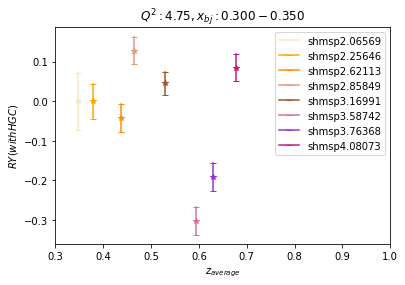

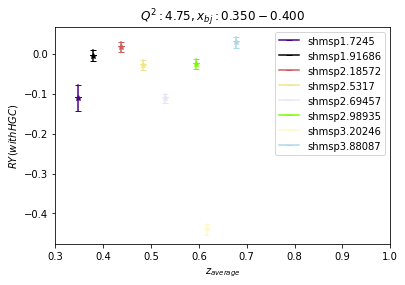

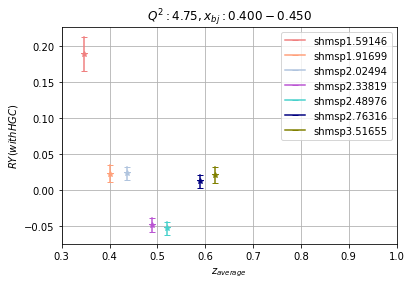

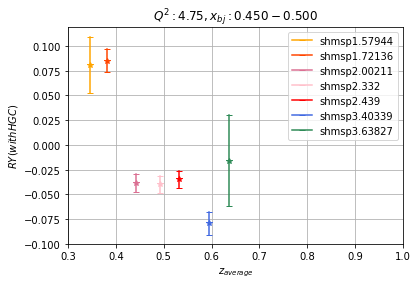

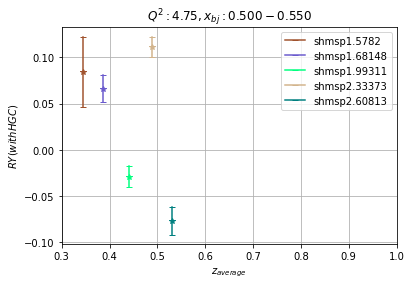

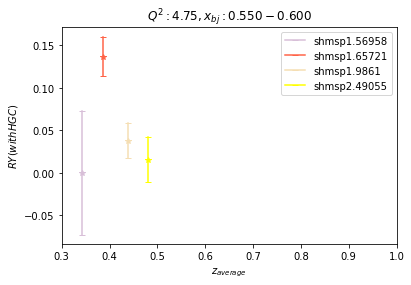

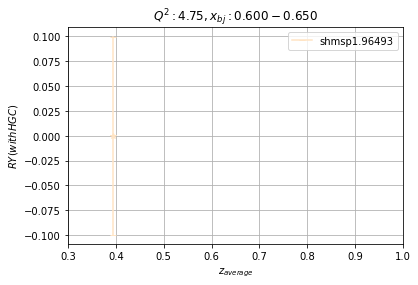

In [9]:
xbj_ones_corr = []
xbj_all_corr=[]
xbj_ones_plot = []
i_col = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','olive','orange','orangered','palevioletred','pink','red','royalblue','seagreen','sienna','slateblue','springgreen','tan','teal','thistle','tomato','wheat','yellow','bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','bisque','orange','darkorange','darksalmon','sienna','bisque','orange','darkorange','darksalmon','sienna']
dRYs = []
dRYs_err = []
xs = df_HGC[df_HGC['Q2']==4.75].sort_values('xbj')['xbj'].unique()
#print(xs)
#ax.errorbar(xs,zs,RYs,RY_err,marker = "_")
for ix in range(0,len(xs)):
    fig = plt.figure()
    ax = fig.add_subplot()
    xbj_one_corr = []
    xbj_one_err_corr = []
    CSV_one = []
    CSV_one_err = []
    #RY_err = []
    zs = df_HGC[df_HGC['Q2']==4.75][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
    #print(zs)
    xbj = xs[ix]
    for iz in zs:
        #print(iRunGroup)
        RYs = []
        RYs_HGC = []
        RYs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        
        for i,row in df_HGC[df_HGC['Q2']==4.75][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
            shmsp = row['shms_p']
            zi_corr = row['z_corr']
            #print(z_corr)
            RYi_noHGC_raw = df_noHGC[df_noHGC['Q2']==4.75][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY_rho'].values[0]
            RYi_error = row['error']
            pi_purity_noHGC = Get_pi_purity_noHGC(shmsp)
            RYi_noHGC = RYi_noHGC_raw*pi_purity_noHGC
            #RYs.append(RYi_noHGC)
            #print('RYi_noHGC = ',RYi_noHGC)
            RYi_HGC_raw= row['RY_rho']
            pi_purity_HGC = Get_pi_purity_HGC(shmsp)
            RYi_HGC = RYi_HGC_raw*pi_purity_HGC
            dRY = (RYi_HGC-RYi_noHGC)/RYi_HGC
            RYs_HGC.append(dRY)
            RYs_error.append(RYi_error)
            #print('RY_error ',RY_error)
            zs_corr.append(zi_corr)
            zi_corr_err = row["z_corr_err"]
            zs_corr_err.append(zi_corr_err)
            xbji_corr = row["xbj_corr"]
            xbji_corr_err = row["xbj_corr_err"]
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = row["Q2_corr"]
            Q2i_corr_err = row["Q2_corr_err"]
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
            if Q2i_corr<3:
                print(Q2i_corr)
         
            xbj_ones_corr.append(xbji_corr)
            if shmsp>2.9:
                dRYs.append(dRY)
                dRYs_err.append(RYi_error)
            #print(xbji_corr)
            #ax.plot([z_corr,z_corr],[RY+RY_error,RY-RY_error],marker="_",color = colors[RunGroup//10])
        xbj_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        #print(xbj_corr)
        if abs(xbj_corr-xbj)>0.025:
            print(xbj_corr-xbj)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        Q2_corr = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        if Q2_corr<3:
            print("corr ",Q2_corr)
        #print('RYs ',RYs)
        #print('RYs err ',RYs_error)
        #RY = Get_weighted_average(RYs,RYs_error)
        RY_err = Get_weighted_sigma(RYs_HGC,RYs_error)
        RY_HGC = Get_weighted_average(RYs_HGC,RYs_error)
       
        #print('RY is ',RY,'RY_HGC is ',RY_HGC)
        #ax.plot([z_corr,z_corr],[RY+RY_err,RY-RY_err],color = colors_all[i_col],marker = "_")
        #plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"$Q^2:{Q2_corr:.3f},x_{{bj}}:{xbj_corr:.3f}$")
        #plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"shmsp{shmsp}")
        ax.plot([z_corr+0.005,z_corr+0.005],[RY_HGC+RY_err,RY_HGC-RY_err],marker = "_",color = colors_all[i_col],label = f"shmsp{shmsp}")
        plt.plot(z_corr+0.005,RY_HGC,"*",color = colors_all[i_col])
        xbj_all_corr.append(xbj_corr)
        xbj_one_corr.append(xbj_corr)
        xbj_onei_err_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_one_err_corr.append(xbj_onei_err_corr)
        plt.xlabel(r'$z_{average}$')
        plt.ylabel(r'$RY(withHGC)$')
        plt.xlim(0.3,1)
        #plt.ylim(0.4,0.85)
        plt.legend()
        plt.grid()
        ax.set_title(f"$Q^2:{Q2_str[1][0:4]},x_{{bj}}:{(xbj-0.025):.3f}-{(xbj+0.025):.3f}$")#str(xbj-0.025)[0:5]+"-"+str(xbj+0.025)[0:5])
        i_col = i_col+1
                    
    xbj_one = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
    xbj_ones_plot.append(xbj_one)
    xbj_one_err = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
print(Get_weighted(dRYs,dRYs_err))

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/2222133200.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df_HGC[df_HGC['Q2']==4.75][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/2222133200.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_HGC[df_HGC['Q2']==4.75][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/2222133200.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RYi_noHGC_raw = df_noHGC[df_noHGC['Q2']==4.75][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY_rho'].values[0]
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


-0.07484456047482466


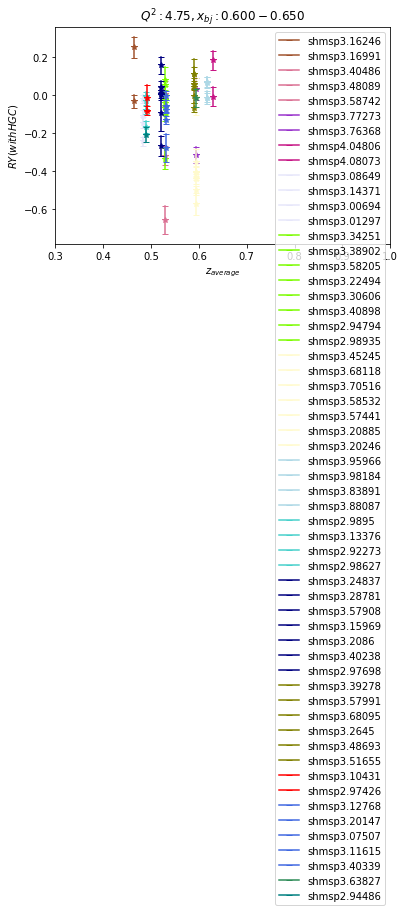

In [10]:
xbj_ones_corr = []
xbj_all_corr=[]
xbj_ones_plot = []
i_col = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','olive','orange','orangered','palevioletred','pink','red','royalblue','seagreen','sienna','slateblue','springgreen','tan','teal','thistle','tomato','wheat','yellow','bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','bisque','orange','darkorange','darksalmon','sienna','bisque','orange','darkorange','darksalmon','sienna']
dRYs = []
dRYs_err = []
xs = df_HGC[df_HGC['Q2']==4.75].sort_values('xbj')['xbj'].unique()
fig = plt.figure()
ax = fig.add_subplot()
#print(xs)
#ax.errorbar(xs,zs,RYs,RY_err,marker = "_")
for ix in range(0,len(xs)):
    
    xbj_one_corr = []
    xbj_one_err_corr = []
    CSV_one = []
    CSV_one_err = []
    #RY_err = []
    zs = df_HGC[df_HGC['Q2']==4.75][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
    #print(zs)
    xbj = xs[ix]
    for iz in zs:
        #print(iRunGroup)
        RYs = []
        RYs_HGC = []
        RYs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        
        for i,row in df_HGC[df_HGC['Q2']==4.75][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
            shmsp = row['shms_p']
            zi_corr = row['z_corr']
            #print(z_corr)
            RYi_noHGC_raw = df_noHGC[df_noHGC['Q2']==4.75][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY_rho'].values[0]
            RYi_error = row['error']
            pi_purity_noHGC = Get_pi_purity_noHGC(shmsp)
            RYi_noHGC = RYi_noHGC_raw*pi_purity_noHGC
            #RYs.append(RYi_noHGC)
            #print('RYi_noHGC = ',RYi_noHGC)
            RYi_HGC_raw = row['RY_rho']
            pi_purity_HGC = Get_pi_purity_HGC(shmsp)
            RYi_HGC = RYi_HGC_raw*pi_purity_HGC
            dRY = (RYi_HGC-RYi_noHGC)/RYi_HGC
            RYs_HGC.append(dRY)
            RYs_error.append(RYi_error)
            #print('RY_error ',RY_error)
            zs_corr.append(zi_corr)
            zi_corr_err = row["z_corr_err"]
            zs_corr_err.append(zi_corr_err)
            xbji_corr = row["xbj_corr"]
            xbji_corr_err = row["xbj_corr_err"]
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = row["Q2_corr"]
            Q2i_corr_err = row["Q2_corr_err"]
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
            if Q2i_corr<3:
                print(Q2i_corr)
         
            xbj_ones_corr.append(xbji_corr)
            if shmsp>2.9:
                dRYs.append(dRY)
                dRYs_err.append(RYi_error)
                ax.plot([z_corr+0.005,z_corr+0.005],[dRY+RYi_error,dRY-RYi_error],marker = "_",color = colors_all[i_col],label = f"shmsp{shmsp}")
                plt.plot(z_corr+0.005,dRY,"*",color = colors_all[i_col])


            #print(xbji_corr)
            #ax.plot([z_corr,z_corr],[RY+RY_error,RY-RY_error],marker="_",color = colors[RunGroup//10])
        xbj_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        #print(xbj_corr)
        if abs(xbj_corr-xbj)>0.025:
            print(xbj_corr-xbj)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        Q2_corr = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        if Q2_corr<3:
            print("corr ",Q2_corr)
        #print('RYs ',RYs)
        #print('RYs err ',RYs_error)
        #RY = Get_weighted_average(RYs,RYs_error)
        RY_err = Get_weighted_sigma(RYs_HGC,RYs_error)
        RY_HGC = Get_weighted_average(RYs_HGC,RYs_error)
       
        #print('RY is ',RY,'RY_HGC is ',RY_HGC)
        #ax.plot([z_corr,z_corr],[RY+RY_err,RY-RY_err],color = colors_all[i_col],marker = "_")
        #plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"$Q^2:{Q2_corr:.3f},x_{{bj}}:{xbj_corr:.3f}$")
        #plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"shmsp{shmsp}")
       
        xbj_all_corr.append(xbj_corr)
        xbj_one_corr.append(xbj_corr)
        xbj_onei_err_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_one_err_corr.append(xbj_onei_err_corr)
        plt.xlabel(r'$z_{average}$')
        plt.ylabel(r'$RY(withHGC)$')
        plt.xlim(0.3,1)
        #plt.ylim(0.4,0.85)
        plt.legend()
        plt.grid()
        ax.set_title(f"$Q^2:{Q2_str[1][0:4]},x_{{bj}}:{(xbj-0.025):.3f}-{(xbj+0.025):.3f}$")#str(xbj-0.025)[0:5]+"-"+str(xbj+0.025)[0:5])
        i_col = i_col+1
                    
    xbj_one = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
    xbj_ones_plot.append(xbj_one)
    xbj_one_err = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
print(Get_weighted(dRYs,dRYs_err))
plt.savefig(f'results/2ndQ2_HGC_dRY_{save_name}.pdf')

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/56522642.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/56522642.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/56522642.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RYi_noHGC_raw = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY_rho'].values[0]


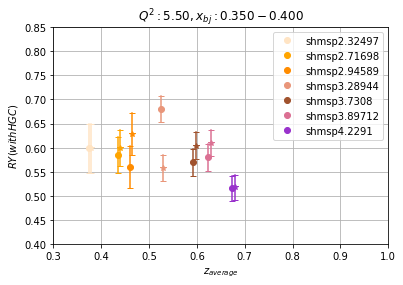

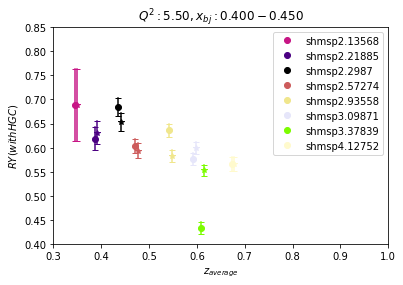

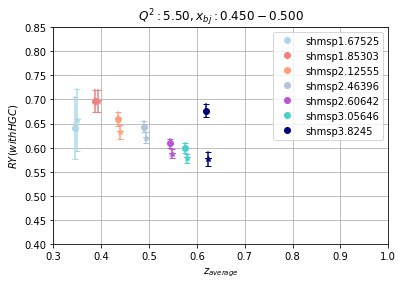

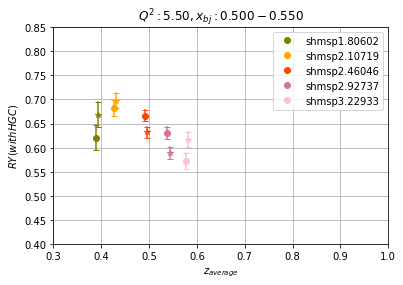

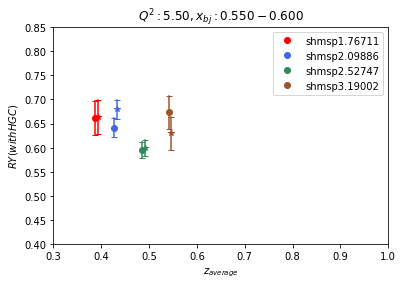

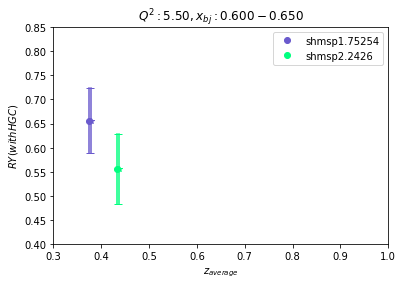

In [11]:
xbj_ones_corr = []
xbj_all_corr=[]
xbj_ones_plot = []
i_col = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','olive','orange','orangered','palevioletred','pink','red','royalblue','seagreen','sienna','slateblue','springgreen','tan','teal','thistle','tomato','wheat','yellow','bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','bisque','orange','darkorange','darksalmon','sienna','bisque','orange','darkorange','darksalmon','sienna']

xs = df_HGC[df_HGC['Q2']==5.5].sort_values('xbj')['xbj'].unique()
#print(xs)
#ax.errorbar(xs,zs,RYs,RY_err,marker = "_")
for ix in range(0,len(xs)):
    fig = plt.figure()
    ax = fig.add_subplot()
    xbj_one_corr = []
    xbj_one_err_corr = []
    CSV_one = []
    CSV_one_err = []
    #RY_err = []
    zs = df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
    #print(zs)
    xbj = xs[ix]
    for iz in zs:
        #print(iRunGroup)
        RYs = []
        RYs_HGC = []
        RYs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        
        for i,row in df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
            shmsp = row['shms_p']
            zi_corr = row['z_corr']
            #print(z_corr)
            #RYi_noHGC = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY'].values[0]
            RYi_noHGC_raw = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY_rho'].values[0]
            RYi_error = row['error']
            pi_purity_noHGC = Get_pi_purity_noHGC(shmsp)
            RYi_noHGC = RYi_noHGC_raw*pi_purity_noHGC
            RYs.append(RYi_noHGC)
            #print('RYi_noHGC = ',RYi_noHGC)
            #RYi_HGC= row['RY']
            RYi_HGC_raw= row['RY_rho']
            pi_purity_HGC = Get_pi_purity_HGC(shmsp)
            RYi_HGC = RYi_HGC_raw*pi_purity_HGC
            RYs_HGC.append(RYi_HGC)
            RYs_error.append(RYi_error)
            #print('RY_error ',RY_error)
            zs_corr.append(zi_corr)
            zi_corr_err = row["z_corr_err"]
            zs_corr_err.append(zi_corr_err)
            xbji_corr = row["xbj_corr"]
            xbji_corr_err = row["xbj_corr_err"]
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = row["Q2_corr"]
            Q2i_corr_err = row["Q2_corr_err"]
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
            if Q2i_corr<3:
                print(Q2i_corr)
         
            xbj_ones_corr.append(xbji_corr)
            #print(xbji_corr)
            #ax.plot([z_corr,z_corr],[RY+RY_error,RY-RY_error],marker="_",color = colors[RunGroup//10])
        xbj_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        #print(xbj_corr)
        if abs(xbj_corr-xbj)>0.025:
            print(xbj_corr-xbj)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        Q2_corr = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        if Q2_corr<3:
            print("corr ",Q2_corr)
        #print('RYs ',RYs)
        #print('RYs err ',RYs_error)
        RY = Get_weighted_average(RYs,RYs_error)
        RY_err = Get_weighted_sigma(RYs,RYs_error)
        RY_HGC = Get_weighted_average(RYs_HGC,RYs_error)
        #print('RY is ',RY,'RY_HGC is ',RY_HGC)
        ax.plot([z_corr,z_corr],[RY+RY_err,RY-RY_err],color = colors_all[i_col],marker = "_")
        #plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"$Q^2:{Q2_corr:.3f},x_{{bj}}:{xbj_corr:.3f}$")
        plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"shmsp{shmsp}")
        ax.plot([z_corr+0.005,z_corr+0.005],[RY_HGC+RY_err,RY_HGC-RY_err],marker = "_",color = colors_all[i_col])
        plt.plot(z_corr+0.005,RY_HGC,"*",color = colors_all[i_col])
        xbj_all_corr.append(xbj_corr)
        xbj_one_corr.append(xbj_corr)
        xbj_onei_err_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_one_err_corr.append(xbj_onei_err_corr)
        plt.xlabel(r'$z_{average}$')
        plt.ylabel(r'$RY(withHGC)$')
        plt.xlim(0.3,1)
        plt.ylim(0.4,0.85)
        plt.legend()
        plt.grid()
        ax.set_title(f"$Q^2:{Q2_str[2][0:4]},x_{{bj}}:{(xbj-0.025):.3f}-{(xbj+0.025):.3f}$")#str(xbj-0.025)[0:5]+"-"+str(xbj+0.025)[0:5])
        i_col = i_col+1
                    
    xbj_one = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
    xbj_ones_plot.append(xbj_one)
    xbj_one_err = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/4053338176.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/4053338176.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/4053338176.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RYi_noHGC_raw = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY_rho'].values[0]


-0.020200404698898708


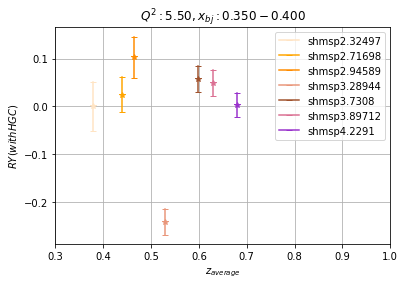

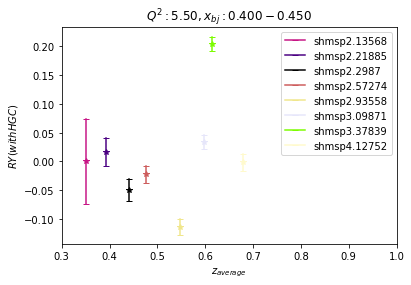

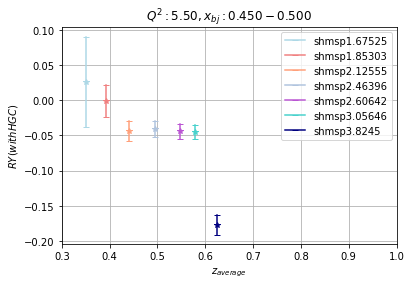

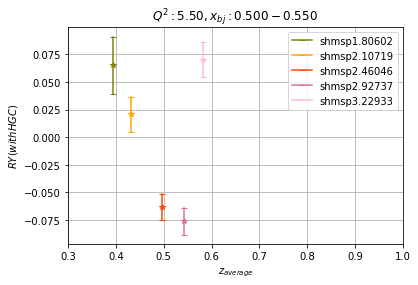

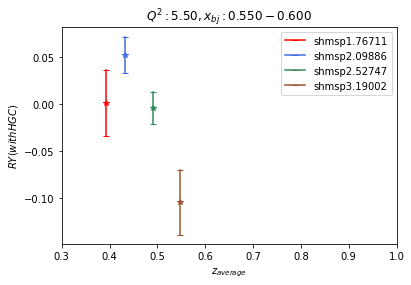

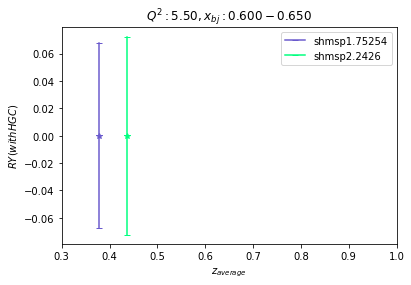

In [12]:
xbj_ones_corr = []
xbj_all_corr=[]
xbj_ones_plot = []
i_col = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','olive','orange','orangered','palevioletred','pink','red','royalblue','seagreen','sienna','slateblue','springgreen','tan','teal','thistle','tomato','wheat','yellow','bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','bisque','orange','darkorange','darksalmon','sienna','bisque','orange','darkorange','darksalmon','sienna']
dRYs = []
dRYs_err = []
xs = df_HGC[df_HGC['Q2']==5.5].sort_values('xbj')['xbj'].unique()
#print(xs)
#ax.errorbar(xs,zs,RYs,RY_err,marker = "_")
for ix in range(0,len(xs)):
    fig = plt.figure()
    ax = fig.add_subplot()
    xbj_one_corr = []
    xbj_one_err_corr = []
    CSV_one = []
    CSV_one_err = []
    #RY_err = []
    zs = df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
    #print(zs)
    xbj = xs[ix]
    for iz in zs:
        #print(iRunGroup)
        RYs = []
        RYs_HGC = []
        RYs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        
        for i,row in df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
            shmsp = row['shms_p']
            zi_corr = row['z_corr']
            #print(z_corr)
            RYi_noHGC_raw = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY_rho'].values[0]
            RYi_error = row['error']
            pi_purity_noHGC = Get_pi_purity_noHGC(shmsp)
            RYi_noHGC = RYi_noHGC_raw*pi_purity_noHGC
            #RYs.append(RYi_noHGC)
            #print('RYi_noHGC = ',RYi_noHGC)
            RYi_HGC_raw = row['RY_rho']
            pi_purity_HGC = Get_pi_purity_HGC(shmsp)
            RYi_HGC = RYi_HGC_raw*pi_purity_HGC
            dRY = (RYi_HGC-RYi_noHGC)/RYi_HGC
            RYs_HGC.append(dRY)
            RYs_error.append(RYi_error)
            #print('RY_error ',RY_error)
            zs_corr.append(zi_corr)
            zi_corr_err = row["z_corr_err"]
            zs_corr_err.append(zi_corr_err)
            xbji_corr = row["xbj_corr"]
            xbji_corr_err = row["xbj_corr_err"]
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = row["Q2_corr"]
            Q2i_corr_err = row["Q2_corr_err"]
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
            if Q2i_corr<3:
                print(Q2i_corr)
         
            xbj_ones_corr.append(xbji_corr)
            if shmsp>2.9:
                dRYs.append(dRY)
                dRYs_err.append(RYi_error)
            #print(xbji_corr)
            #ax.plot([z_corr,z_corr],[RY+RY_error,RY-RY_error],marker="_",color = colors[RunGroup//10])
        xbj_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        #print(xbj_corr)
        if abs(xbj_corr-xbj)>0.025:
            print(xbj_corr-xbj)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        Q2_corr = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        if Q2_corr<3:
            print("corr ",Q2_corr)
        #print('RYs ',RYs)
        #print('RYs err ',RYs_error)
        #RY = Get_weighted_average(RYs,RYs_error)
        RY_err = Get_weighted_sigma(RYs_HGC,RYs_error)
        RY_HGC = Get_weighted_average(RYs_HGC,RYs_error)
        dRYs.append(RY_HGC)
        dRYs_err.append(RY_err)
        #print('RY is ',RY,'RY_HGC is ',RY_HGC)
        #ax.plot([z_corr,z_corr],[RY+RY_err,RY-RY_err],color = colors_all[i_col],marker = "_")
        #plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"$Q^2:{Q2_corr:.3f},x_{{bj}}:{xbj_corr:.3f}$")
        #plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"shmsp{shmsp}")
        ax.plot([z_corr+0.005,z_corr+0.005],[RY_HGC+RY_err,RY_HGC-RY_err],marker = "_",color = colors_all[i_col],label = f"shmsp{shmsp}")
        plt.plot(z_corr+0.005,RY_HGC,"*",color = colors_all[i_col])
        xbj_all_corr.append(xbj_corr)
        xbj_one_corr.append(xbj_corr)
        xbj_onei_err_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_one_err_corr.append(xbj_onei_err_corr)
        plt.xlabel(r'$z_{average}$')
        plt.ylabel(r'$RY(withHGC)$')
        plt.xlim(0.3,1)
        #plt.ylim(0.4,0.85)
        plt.legend()
        plt.grid()
        ax.set_title(f"$Q^2:{Q2_str[2][0:4]},x_{{bj}}:{(xbj-0.025):.3f}-{(xbj+0.025):.3f}$")#str(xbj-0.025)[0:5]+"-"+str(xbj+0.025)[0:5])
        i_col = i_col+1
                    
    xbj_one = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
    xbj_ones_plot.append(xbj_one)
    xbj_one_err = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
print(Get_weighted(dRYs,dRYs_err))

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/3401373331.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/3401373331.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_69987/3401373331.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RYi_noHGC_raw = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY_rho'].values[0]
No handles with labels found to put in legend.
No handles with labels found to put in legend.


-0.020200404698898708


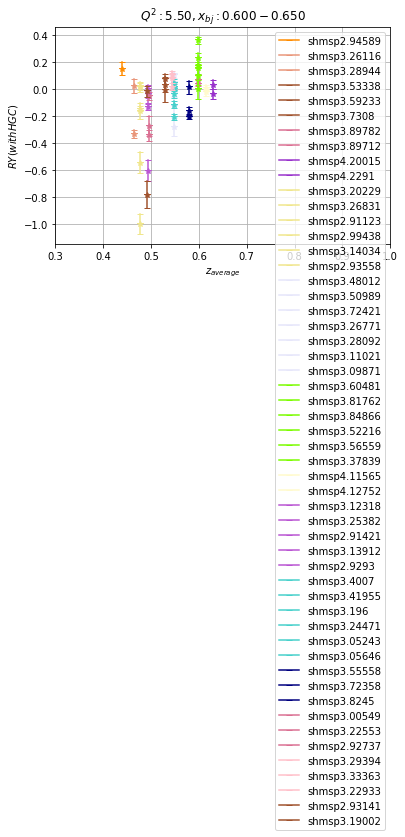

In [13]:
xbj_ones_corr = []
xbj_all_corr=[]
xbj_ones_plot = []
i_col = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','olive','orange','orangered','palevioletred','pink','red','royalblue','seagreen','sienna','slateblue','springgreen','tan','teal','thistle','tomato','wheat','yellow','bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','bisque','orange','darkorange','darksalmon','sienna','bisque','orange','darkorange','darksalmon','sienna']
dRYs = []
dRYs_err = []
xs = df_HGC[df_HGC['Q2']==5.5].sort_values('xbj')['xbj'].unique()
fig = plt.figure()
ax = fig.add_subplot()
#print(xs)
#ax.errorbar(xs,zs,RYs,RY_err,marker = "_")
for ix in range(0,len(xs)):
    
    xbj_one_corr = []
    xbj_one_err_corr = []
    CSV_one = []
    CSV_one_err = []
    #RY_err = []
    zs = df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
    #print(zs)
    xbj = xs[ix]
    for iz in zs:
        #print(iRunGroup)
        RYs = []
        RYs_HGC = []
        RYs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        
        for i,row in df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
            shmsp = row['shms_p']
            zi_corr = row['z_corr']
            #print(z_corr)
            RYi_noHGC_raw = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['RY_rho'].values[0]
            RYi_error = row['error']
            pi_purity_noHGC = Get_pi_purity_noHGC(shmsp)
            RYi_noHGC = RYi_noHGC_raw*pi_purity_noHGC
            #RYs.append(RYi_noHGC)
            #print('RYi_noHGC = ',RYi_noHGC)
            RYi_HGC_raw = row['RY_rho']
            pi_purity_HGC = Get_pi_purity_HGC(shmsp)
            RYi_HGC = RYi_HGC_raw*pi_purity_HGC
            dRY = (RYi_HGC-RYi_noHGC)/RYi_HGC
            RYs_HGC.append(dRY)
            RYs_error.append(RYi_error)
            #print('RY_error ',RY_error)
            zs_corr.append(zi_corr)
            zi_corr_err = row["z_corr_err"]
            zs_corr_err.append(zi_corr_err)
            xbji_corr = row["xbj_corr"]
            xbji_corr_err = row["xbj_corr_err"]
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = row["Q2_corr"]
            Q2i_corr_err = row["Q2_corr_err"]
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
            if Q2i_corr<3:
                print(Q2i_corr)
         
            xbj_ones_corr.append(xbji_corr)
            if shmsp>2.9:
                dRYs.append(dRY)
                dRYs_err.append(RYi_error)
                ax.plot([z_corr+0.005,z_corr+0.005],[dRY+RYi_error,dRY-RYi_error],marker = "_",color = colors_all[i_col],label = f"shmsp{shmsp}")
                plt.plot(z_corr+0.005,dRY,"*",color = colors_all[i_col])


            #print(xbji_corr)
            #ax.plot([z_corr,z_corr],[RY+RY_error,RY-RY_error],marker="_",color = colors[RunGroup//10])
        xbj_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        #print(xbj_corr)
        if abs(xbj_corr-xbj)>0.025:
            print(xbj_corr-xbj)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        Q2_corr = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        if Q2_corr<3:
            print("corr ",Q2_corr)
        #print('RYs ',RYs)
        #print('RYs err ',RYs_error)
        #RY = Get_weighted_average(RYs,RYs_error)
        RY_err = Get_weighted_sigma(RYs_HGC,RYs_error)
        RY_HGC = Get_weighted_average(RYs_HGC,RYs_error)
        dRYs.append(RY_HGC)
        dRYs_err.append(RY_err)
        #print('RY is ',RY,'RY_HGC is ',RY_HGC)
        #ax.plot([z_corr,z_corr],[RY+RY_err,RY-RY_err],color = colors_all[i_col],marker = "_")
        #plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"$Q^2:{Q2_corr:.3f},x_{{bj}}:{xbj_corr:.3f}$")
        #plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"shmsp{shmsp}")
      
        xbj_all_corr.append(xbj_corr)
        xbj_one_corr.append(xbj_corr)
        xbj_onei_err_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_one_err_corr.append(xbj_onei_err_corr)
        plt.xlabel(r'$z_{average}$')
        plt.ylabel(r'$RY(withHGC)$')
        plt.xlim(0.3,1)
        #plt.ylim(0.4,0.85)
        plt.legend()
        plt.grid()
        ax.set_title(f"$Q^2:{Q2_str[2][0:4]},x_{{bj}}:{(xbj-0.025):.3f}-{(xbj+0.025):.3f}$")#str(xbj-0.025)[0:5]+"-"+str(xbj+0.025)[0:5])
        i_col = i_col+1
                    
    xbj_one = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
    xbj_ones_plot.append(xbj_one)
    xbj_one_err = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
print(Get_weighted(dRYs,dRYs_err))
plt.savefig(f'results/3rdQ2_HGC_dRY_{save_name}.pdf')